# Practice 1


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset car sales

In [59]:
df = pd.read_csv('car_sales.csv')
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


### Check df shape and create a new_df with similar shape

In [60]:
df.shape

(10, 5)

In [61]:
# Create a DataFrame with NaN values
new_df_nan = pd.DataFrame(index=range(df.shape[0]), columns=range(df.shape[1]))
# Create a DataFrame with zeros
new_df_zeros =  pd.DataFrame(np.zeros((df.shape[0], df.shape[1])))
# Print the shapes of the new dfs
print(new_df_nan.shape)
print(new_df_zeros.shape)

(10, 5)
(10, 5)


### Check df data types and its basic statistics

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Make      9 non-null      object 
 1   Colour    9 non-null      object 
 2   Odometer  6 non-null      float64
 3   Doors     9 non-null      float64
 4   Price     8 non-null      object 
dtypes: float64(2), object(3)
memory usage: 528.0+ bytes


In [63]:
df.dtypes

Make         object
Colour       object
Odometer    float64
Doors       float64
Price        object
dtype: object

### Convert column Price to float, to check its statistics

In [64]:
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

In [65]:
df.dtypes

Make         object
Colour       object
Odometer    float64
Doors       float64
Price       float64
dtype: object

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Odometer,6.0,92302.666667,76489.805168,11179.0,38700.0,73949.5,134507.0,213095.0
Doors,9.0,4.000000,0.500000,3.0,4.0,4.0,4.0,5.0
Price,8.0,7900.000000,6065.829351,3500.0,4375.0,6000.0,8050.0,22000.0


### Show graphically the number of Km for each car brand

In [67]:
by_brand = df.groupby('Make')
# Iterate through groups and print each group
for name, group in by_brand:
    print(f"Group: {name}")
    print(group)
    print("\n")

Group: BMW
  Make Colour  Odometer  Doors    Price
3  BMW  Black   11179.0    5.0  22000.0


Group: Honda
    Make Colour  Odometer  Doors   Price
1  Honda    Red   87899.0    4.0  5000.0
6  Honda    NaN       NaN    4.0  7500.0
7  Honda   Blue       NaN    4.0     NaN


Group: Nissan
     Make Colour  Odometer  Doors   Price
4  Nissan  White  213095.0    4.0  3500.0


Group: Toyota
     Make Colour  Odometer  Doors   Price
0  Toyota  White  150043.0    4.0  4000.0
2  Toyota   Blue       NaN    3.0  7000.0
5  Toyota  Green       NaN    4.0  4500.0
8  Toyota  White   60000.0    NaN     NaN




In [68]:
# Group by 'Brand' and sum the kilometers for each brand
brand_km = df.groupby('Make')['Odometer'].sum().reset_index()
brand_km

,Make,Odometer
0,BMW,11179.0
1,Honda,87899.0
2,Nissan,213095.0
3,Toyota,210043.0


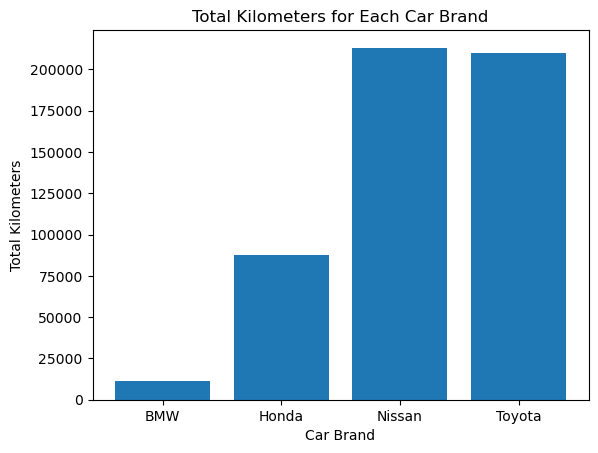

In [69]:
# Plot the data
plt.bar(brand_km['Make'], brand_km['Odometer'])
plt.xlabel('Car Brand')
plt.ylabel('Total Kilometers')
plt.title('Total Kilometers for Each Car Brand')
plt.show()

### Check if there are null values

In [70]:
null_summary = df.isnull().sum()
print("Null Value Summary:")
print(null_summary)

Null Value Summary:
Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64


### Correct the null values with default values

In [71]:
mean_value_odometer = df['Odometer'].mean()
mean_value_doors = df['Doors'].mean()
mean_value_price = df['Price'].mean()
df['Odometer'] = df['Odometer'].fillna(mean_value_odometer)
df['Doors'] = df['Doors'].fillna(mean_value_doors)
df['Price'] = df['Price'].fillna(mean_value_price)
# Most appearing Make on the dataframe (mode)
# Get the most frequent value (if there is a unique mode) (iloc[0])
mode_value_make = df['Make'].mode().iloc[0]
df['Make'] = df['Make'].fillna(mode_value_make)
# Most frequent colour value
mode_value_colour = df['Colour'].mode().iloc[0]
df['Colour'] = df['Colour'].fillna(mode_value_colour)
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,4000.0
1,Honda,Red,87899.000000,4.0,5000.0
2,Toyota,Blue,92302.666667,3.0,7000.0
3,BMW,Black,11179.000000,5.0,22000.0
4,Nissan,White,213095.000000,4.0,3500.0
5,Toyota,Green,92302.666667,4.0,4500.0
6,Honda,White,92302.666667,4.0,7500.0
7,Honda,Blue,92302.666667,4.0,7900.0
8,Toyota,White,60000.000000,4.0,7900.0
9,Toyota,White,31600.000000,4.0,9700.0


### Create a new feature corresponding to the cost of the car, in Euros. Check the actual dollars rate.

In [72]:
exchange_rate = 0.93
df['Price_in_euros'] = df['Price'] * exchange_rate
df

,Make,Colour,Odometer,Doors,Price,Price_in_euros
0,Toyota,White,150043.000000,4.0,4000.0,3720.0
1,Honda,Red,87899.000000,4.0,5000.0,4650.0
2,Toyota,Blue,92302.666667,3.0,7000.0,6510.0
3,BMW,Black,11179.000000,5.0,22000.0,20460.0
4,Nissan,White,213095.000000,4.0,3500.0,3255.0
5,Toyota,Green,92302.666667,4.0,4500.0,4185.0
6,Honda,White,92302.666667,4.0,7500.0,6975.0
7,Honda,Blue,92302.666667,4.0,7900.0,7347.0
8,Toyota,White,60000.000000,4.0,7900.0,7347.0
9,Toyota,White,31600.000000,4.0,9700.0,9021.0


In [73]:
# Go back to the original dollar for Price and , for the thousands
# Round the 'Price' column and convert to integers
# round(0) -> rounding to zero decimal places 
df['Price'] = df['Price'].round(0).astype(int)
# Format the 'Price' column to include a comma for thousands
df['Price'] = df['Price'].apply(lambda x: "{:,}".format(x))
df['Price'] = '$' + df['Price'].astype(str)
# Change Price_in_euros
df['Price_in_euros'] = df['Price_in_euros'].round(0).astype(int)
df['Price_in_euros'] = df['Price_in_euros'].apply(lambda x: "{:,}".format(x))
df['Price_in_euros'] = '€' + df['Price_in_euros'].astype(str)
df

,Make,Colour,Odometer,Doors,Price,Price_in_euros
0,Toyota,White,150043.000000,4.0,"$4,000","€3,720"
1,Honda,Red,87899.000000,4.0,"$5,000","€4,650"
2,Toyota,Blue,92302.666667,3.0,"$7,000","€6,510"
3,BMW,Black,11179.000000,5.0,"$22,000","€20,460"
4,Nissan,White,213095.000000,4.0,"$3,500","€3,255"
5,Toyota,Green,92302.666667,4.0,"$4,500","€4,185"
6,Honda,White,92302.666667,4.0,"$7,500","€6,975"
7,Honda,Blue,92302.666667,4.0,"$7,900","€7,347"
8,Toyota,White,60000.000000,4.0,"$7,900","€7,347"
9,Toyota,White,31600.000000,4.0,"$9,700","€9,021"


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Make            10 non-null     object 
 1   Colour          10 non-null     object 
 2   Odometer        10 non-null     float64
 3   Doors           10 non-null     float64
 4   Price           10 non-null     object 
 5   Price_in_euros  10 non-null     object 
dtypes: float64(2), object(4)
memory usage: 608.0+ bytes


### Expand the dataset with a 1000 more records

In [75]:
# Add duplicates of the original 10 rows to create a total of 1010 rows
# df.sample(n=1000, replace=True) ->  randomly select rows from the DataFrame
# .replace=True -> Allows for sampling with replacement, meaning the same row can be selected multiple times.
# .reset_index(drop=True) -> Reset index, drop=True to drop the existing index and replace it with the default integer index.
expanded_df = pd.concat([df, df.sample(n=1000, replace=True)]).reset_index(drop=True)
expanded_df

,Make,Colour,Odometer,Doors,Price,Price_in_euros
0,Toyota,White,150043.000000,4.0,"$4,000","€3,720"
1,Honda,Red,87899.000000,4.0,"$5,000","€4,650"
2,Toyota,Blue,92302.666667,3.0,"$7,000","€6,510"
3,BMW,Black,11179.000000,5.0,"$22,000","€20,460"
4,Nissan,White,213095.000000,4.0,"$3,500","€3,255"
...,...,...,...,...,...,...
1005,Honda,Blue,92302.666667,4.0,"$7,900","€7,347"
1006,Nissan,White,213095.000000,4.0,"$3,500","€3,255"
1007,Toyota,White,150043.000000,4.0,"$4,000","€3,720"
1008,Toyota,White,150043.000000,4.0,"$4,000","€3,720"


### Export the resulting dataset to a new file, without indexes.

In [76]:
expanded_df.to_csv('expanded_car_sales.csv', index=False)